# Processing TESS sector 27 data for TOI4504

In [4]:
import sys
sys.path.append('../src/curvesimulator/')
from cs_flux_data import *
%matplotlib inline
path = '../research/star_systems/TOI-4504/lightkurve/'


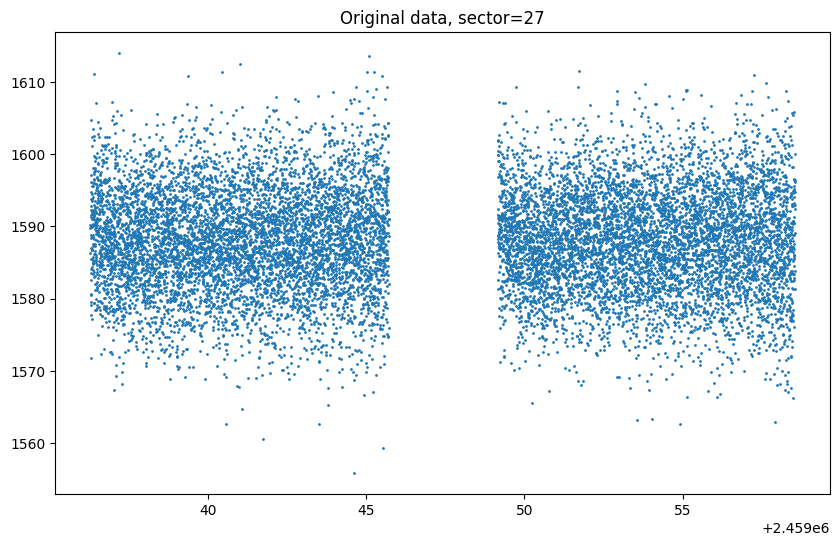

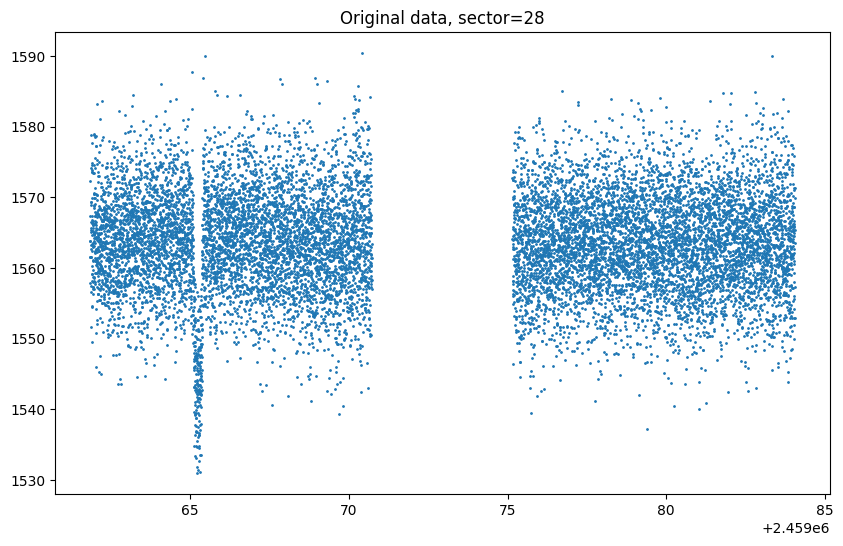

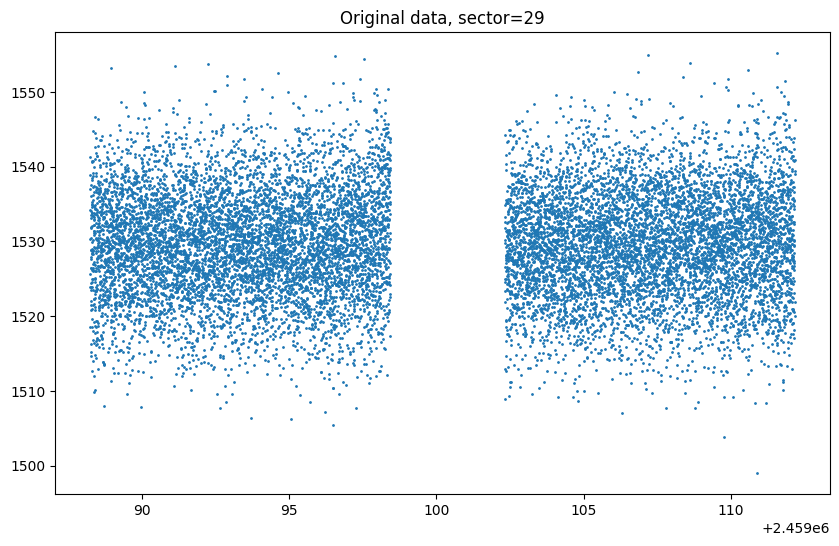

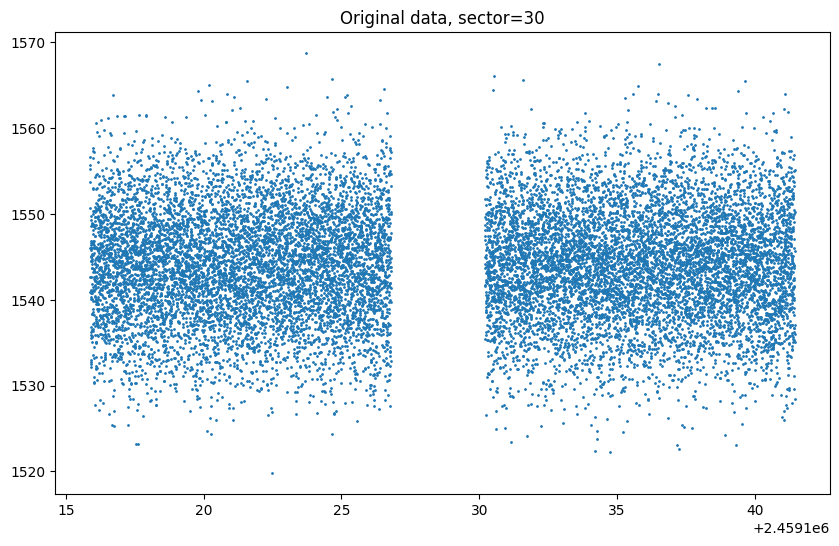

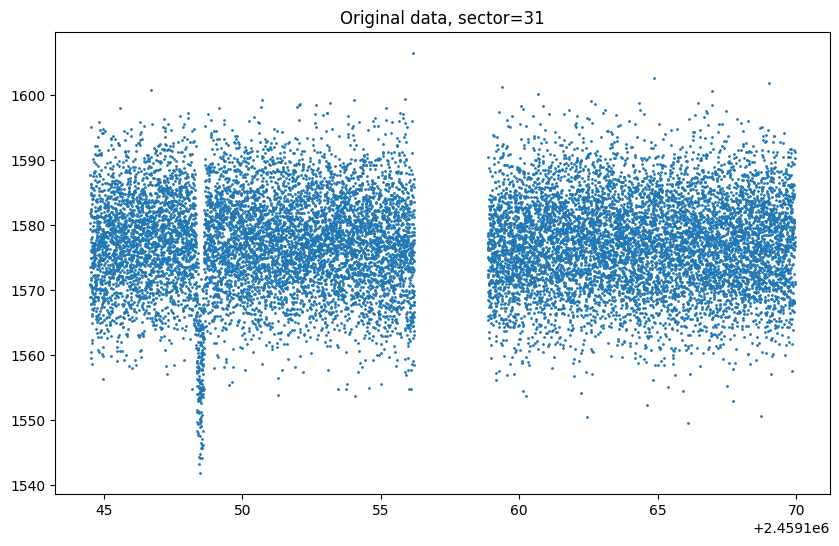

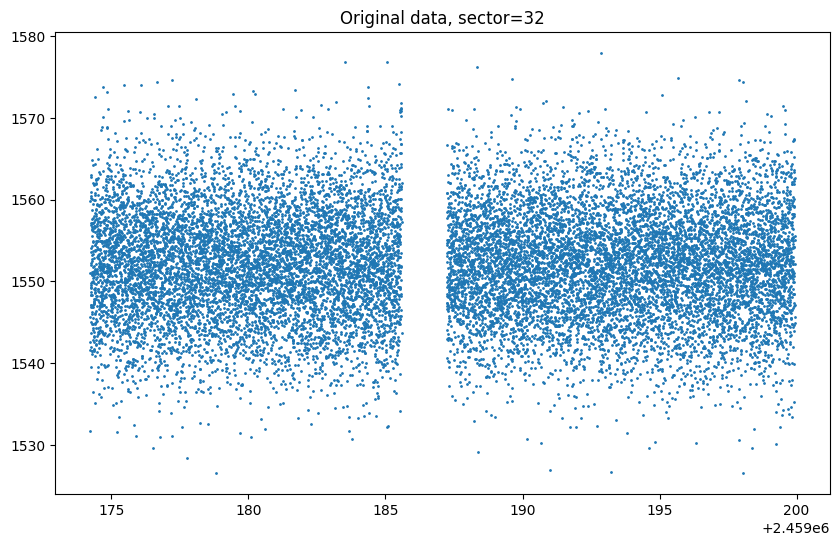

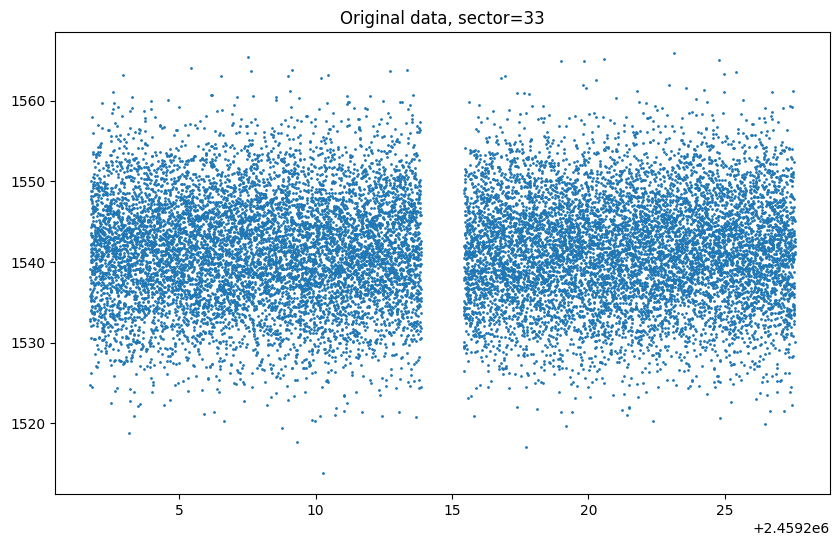

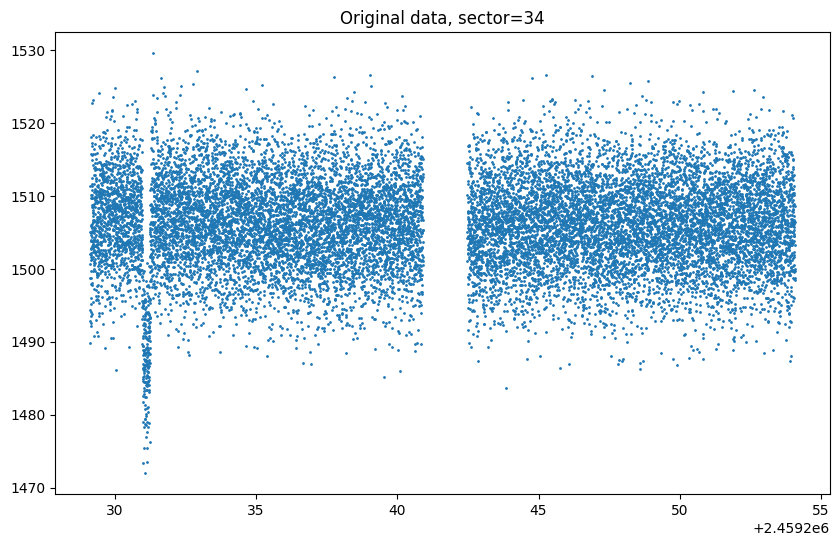

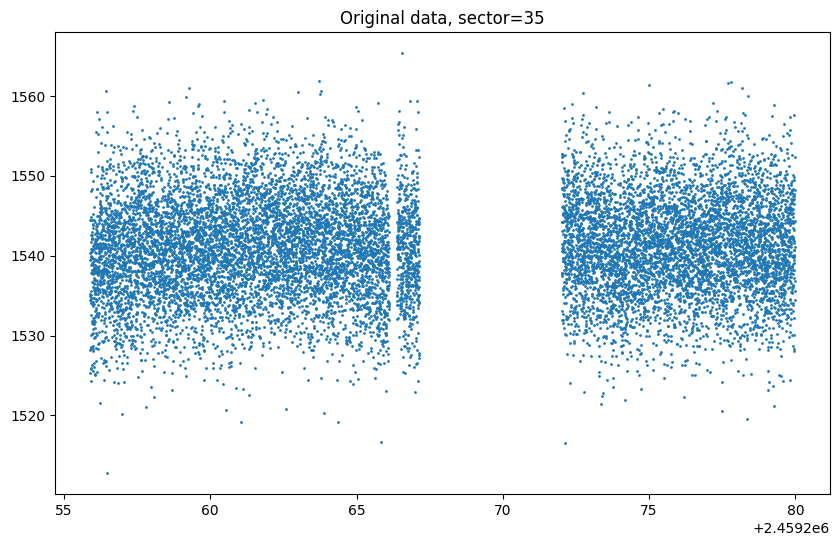

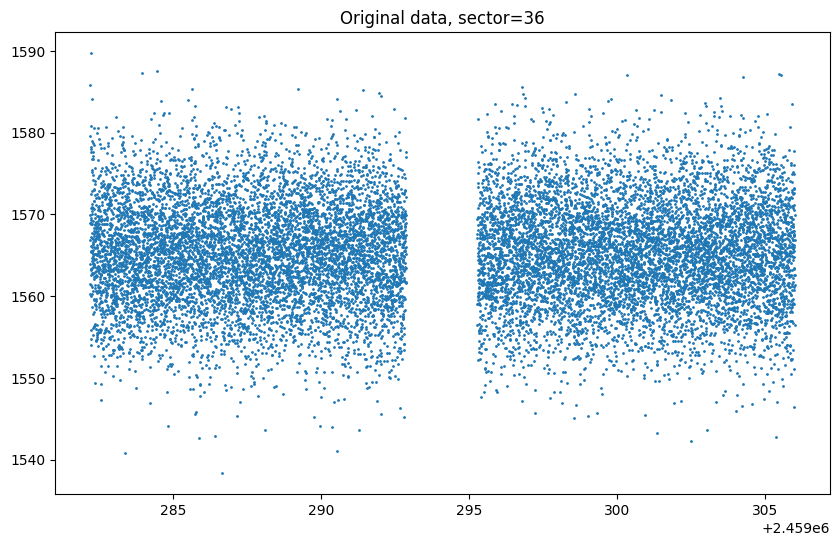

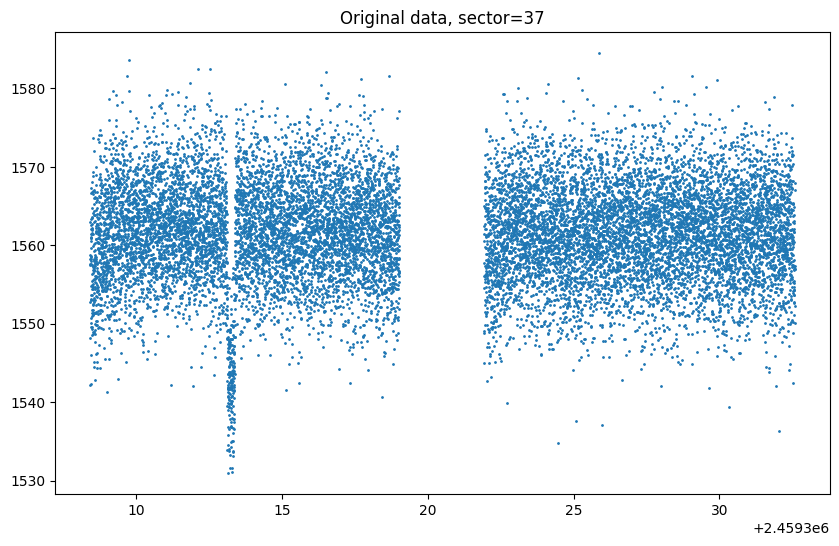

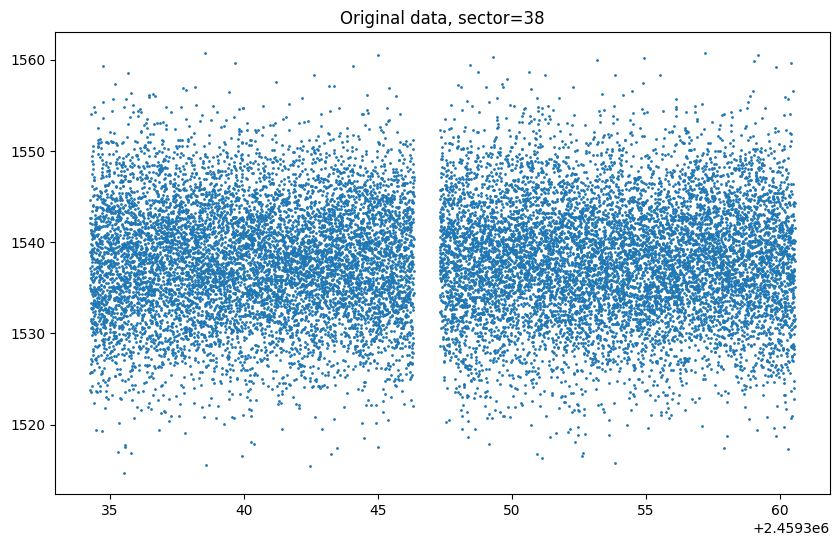

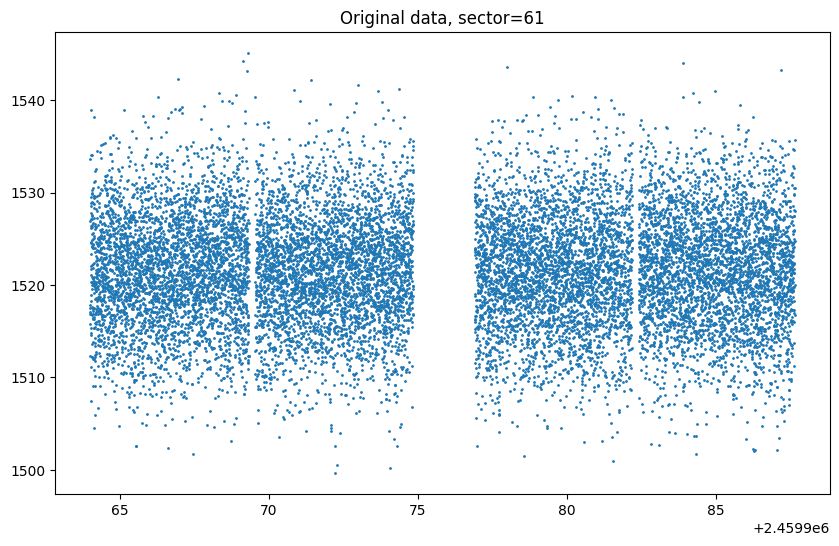

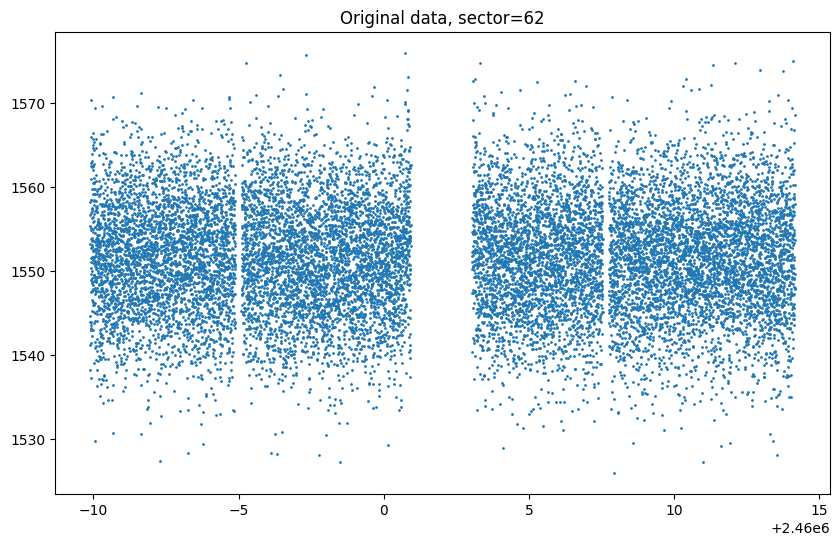

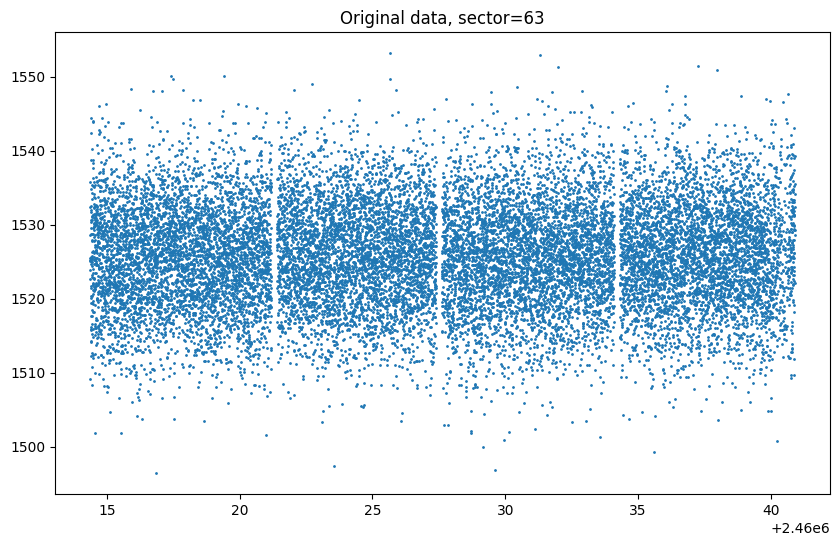

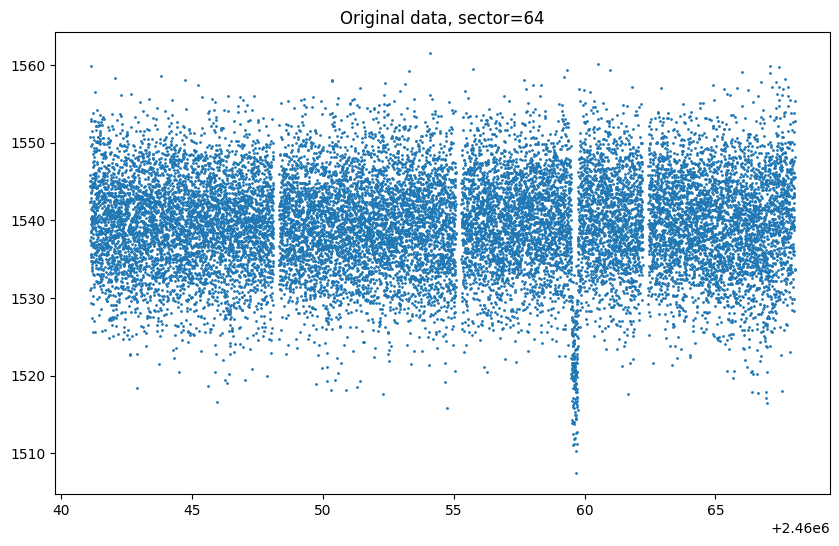

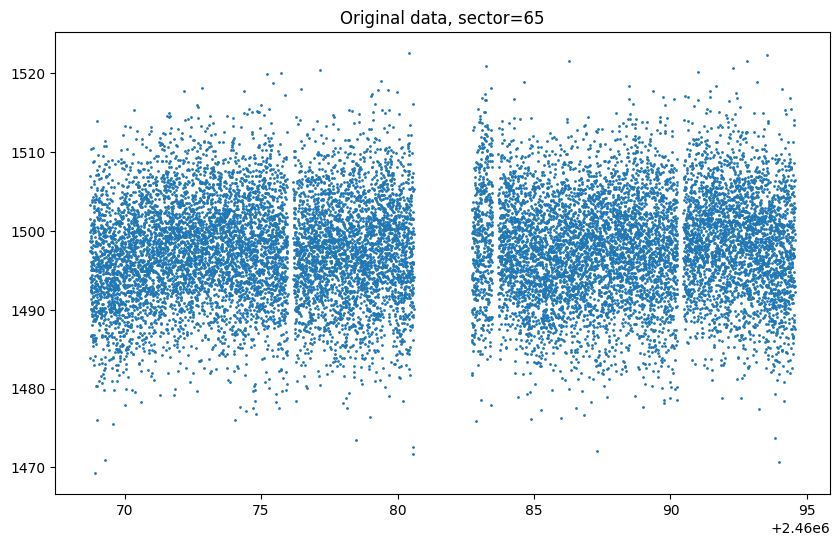

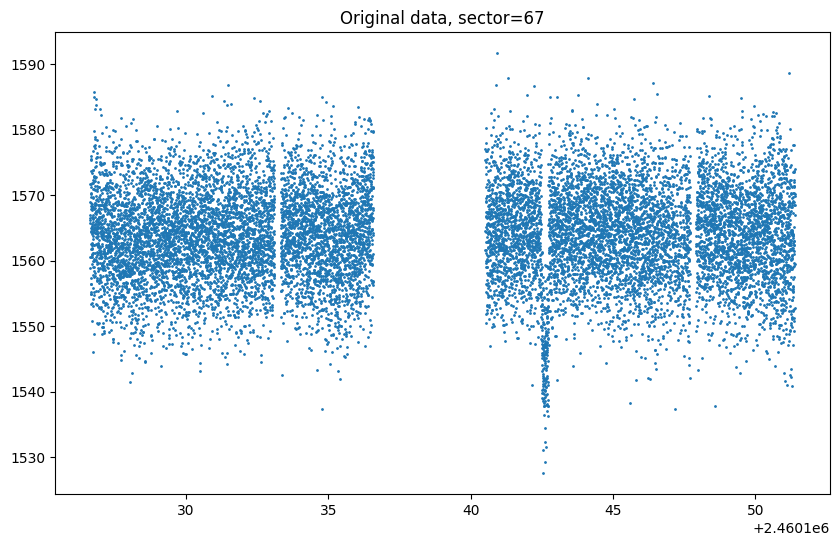

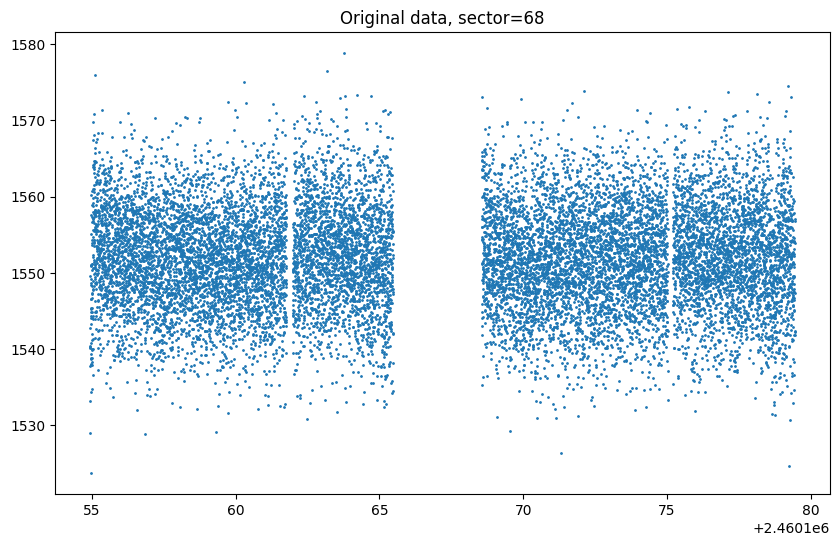

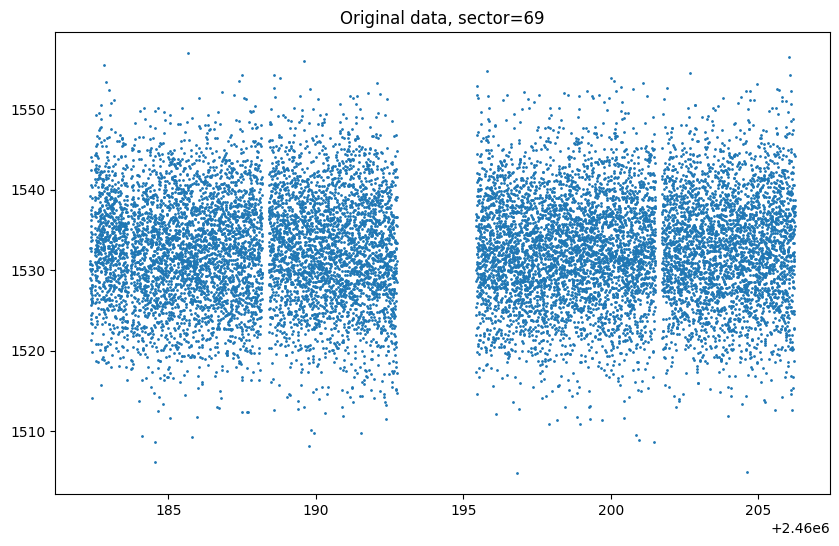

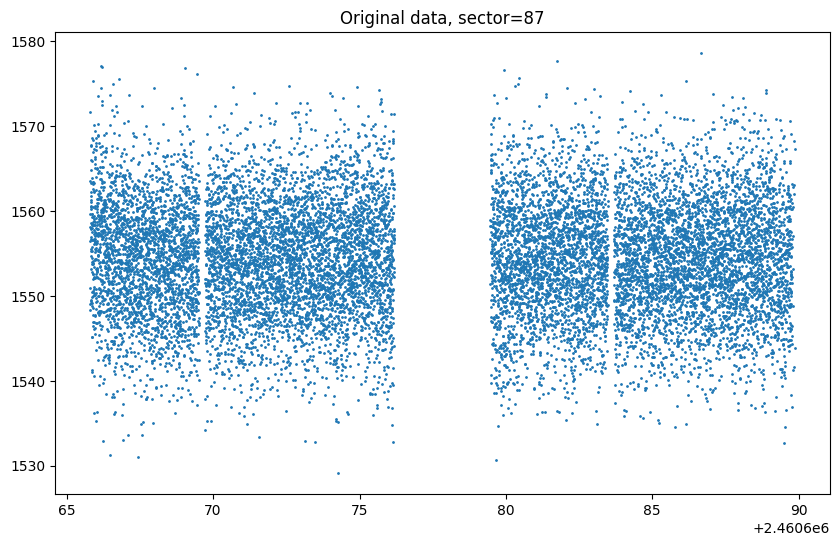

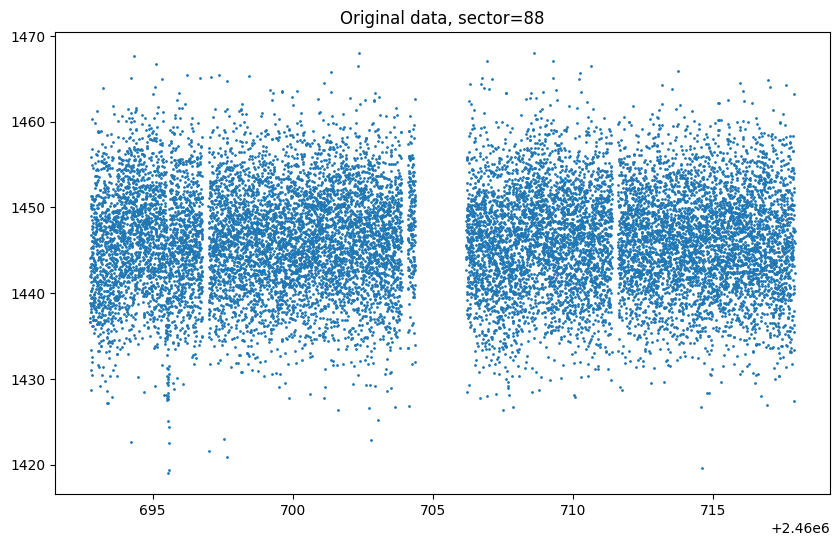

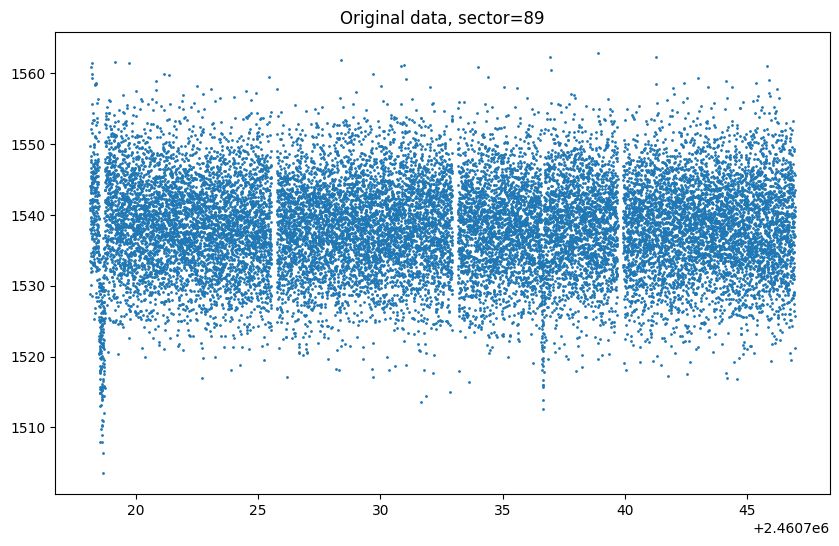

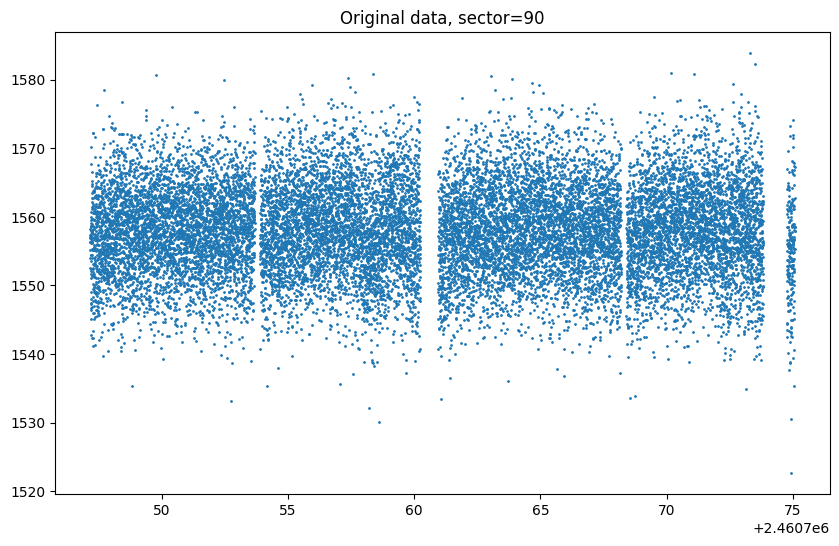

In [5]:
spoc_sectors = [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 61, 62, 63, 64, 65, 67, 68, 69, 87, 88, 89, 90]
spoc_dfs = []
for sector in spoc_sectors:
    full_path = path + f"{sector}/{sector}_SPOC_120.csv"
    df = csv2df(full_path)
    df = tesstime2bjd(df)
    spoc_dfs.append(df)
    plot_this(df.time, [df.flux], ["flux"], title=f"Original data, {sector=}")

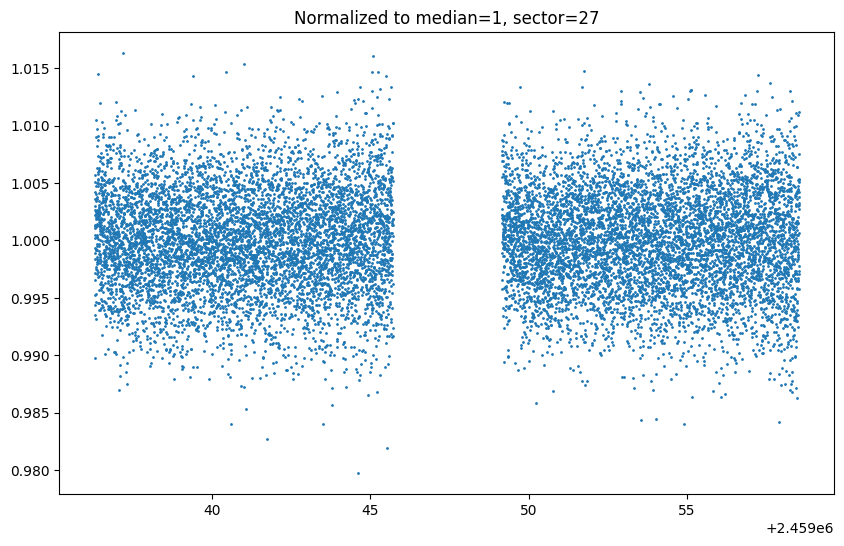

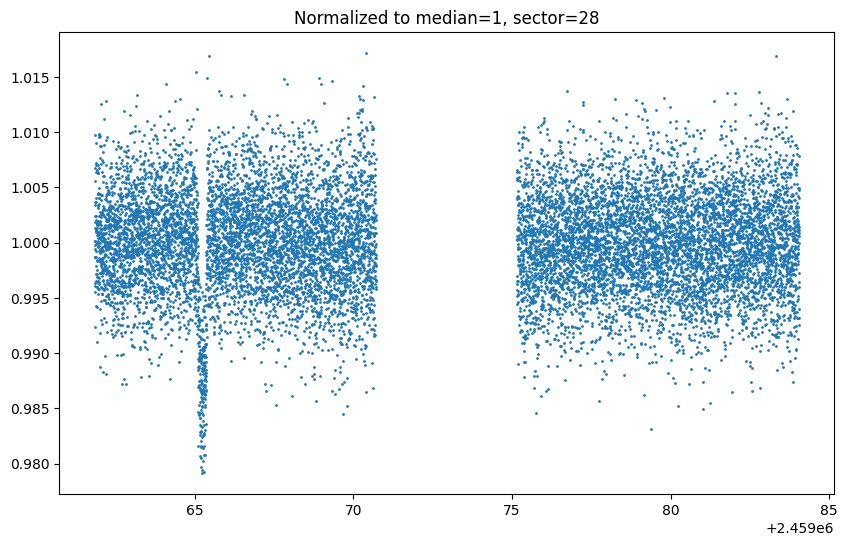

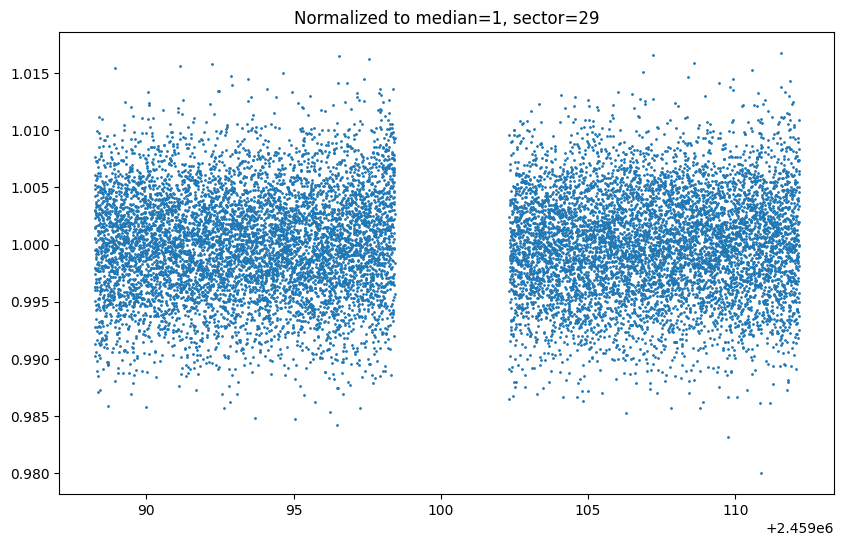

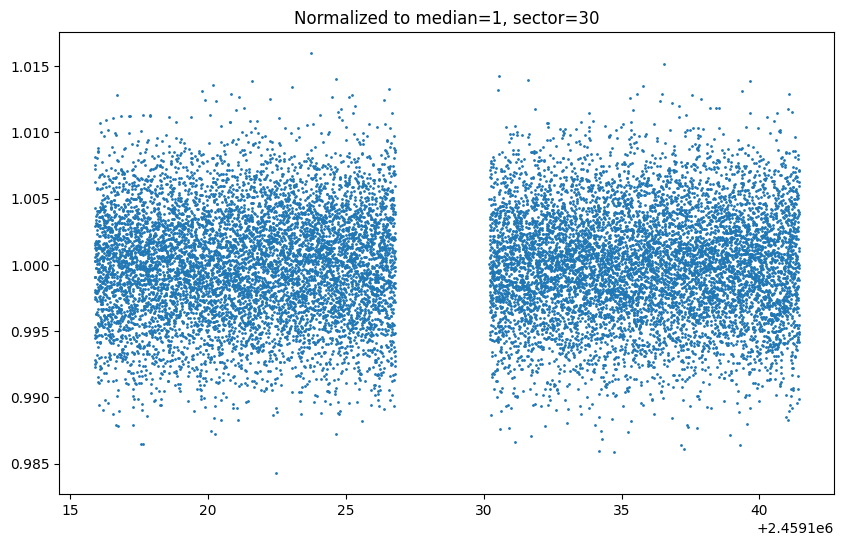

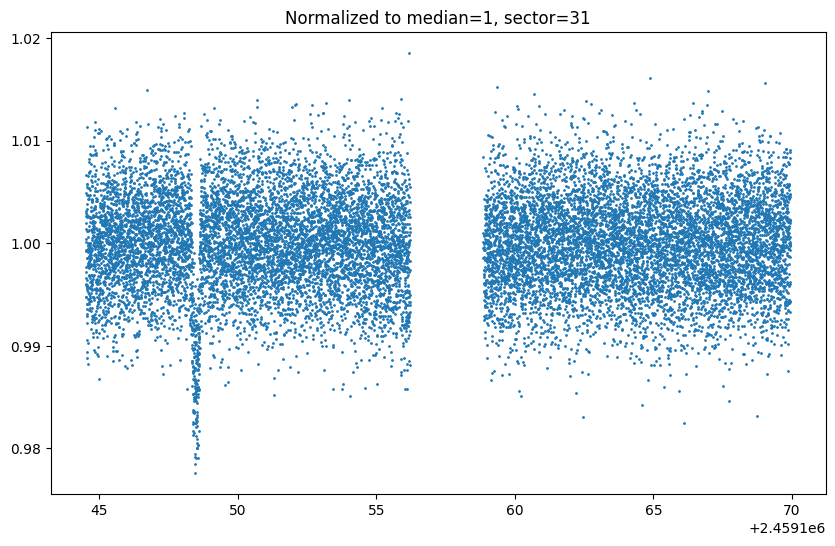

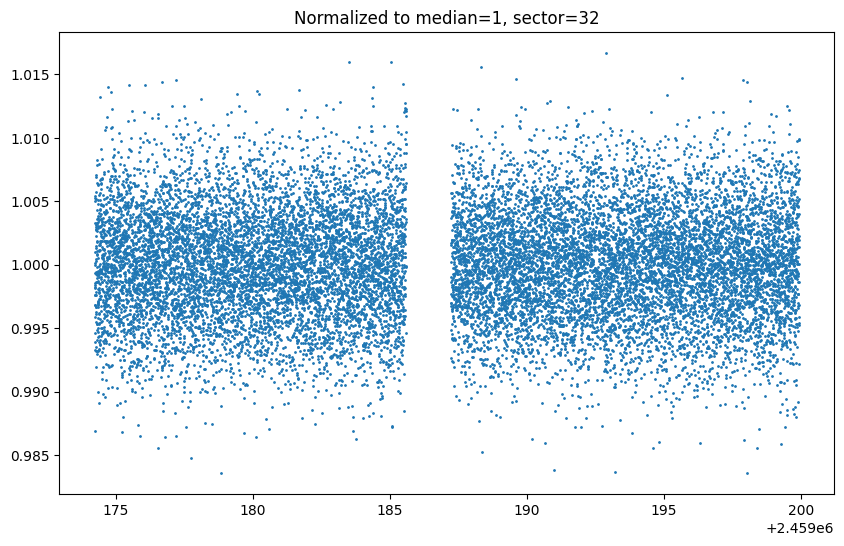

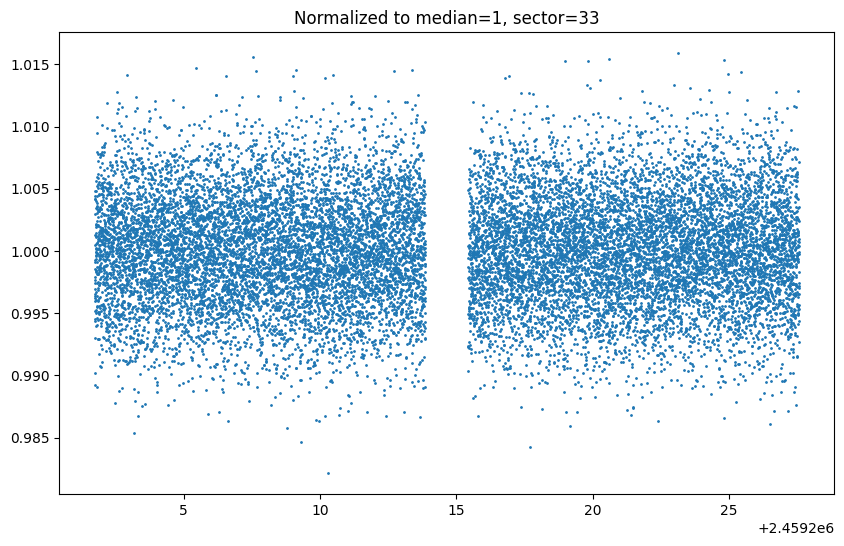

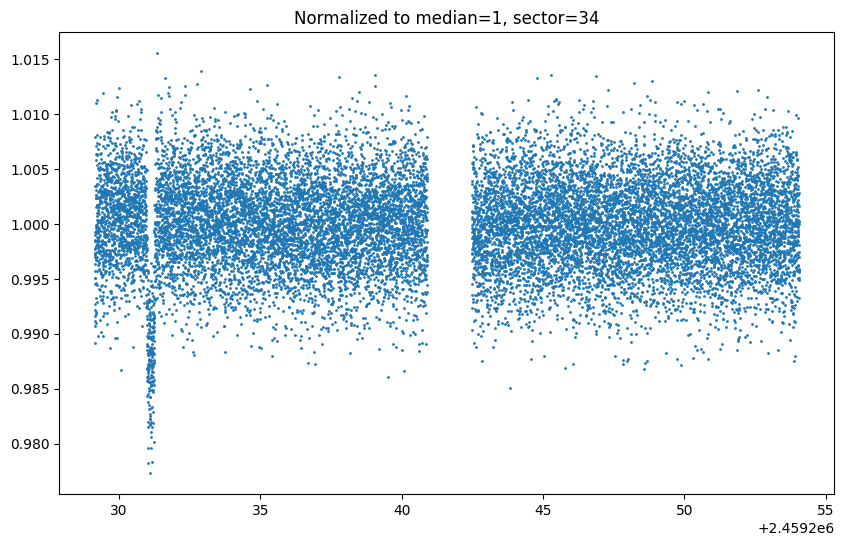

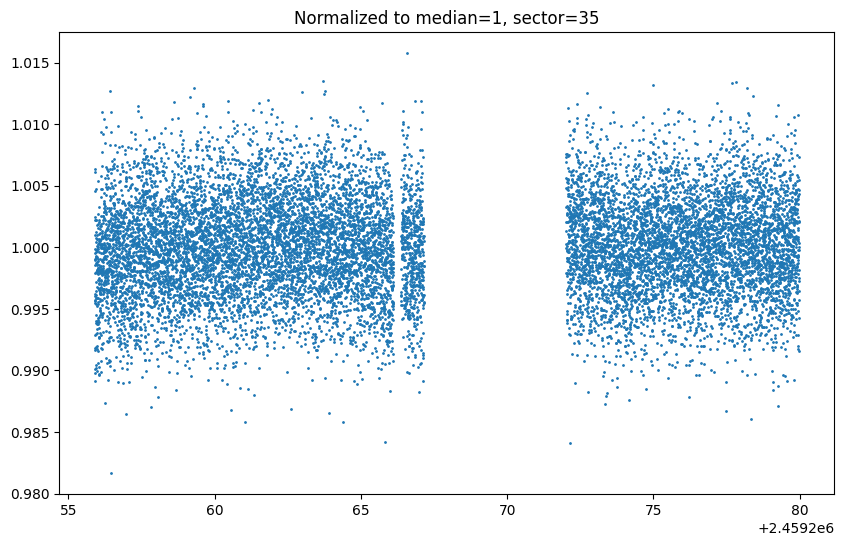

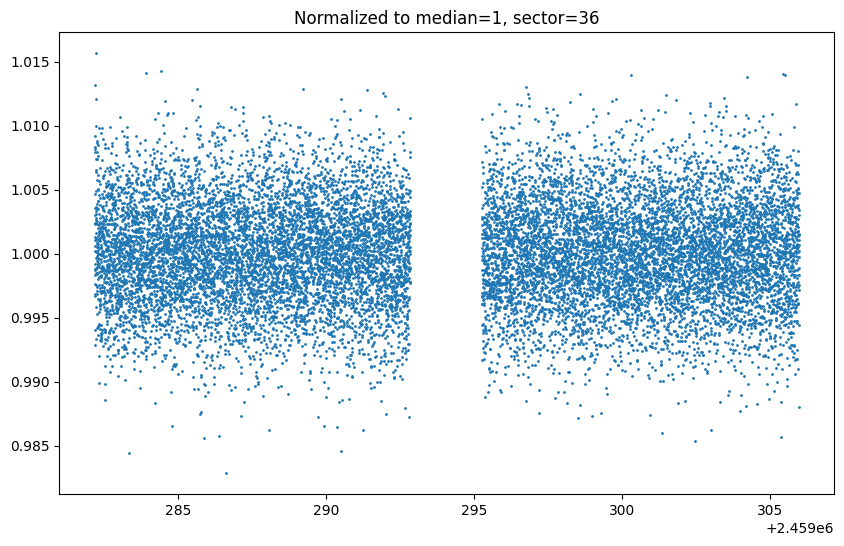

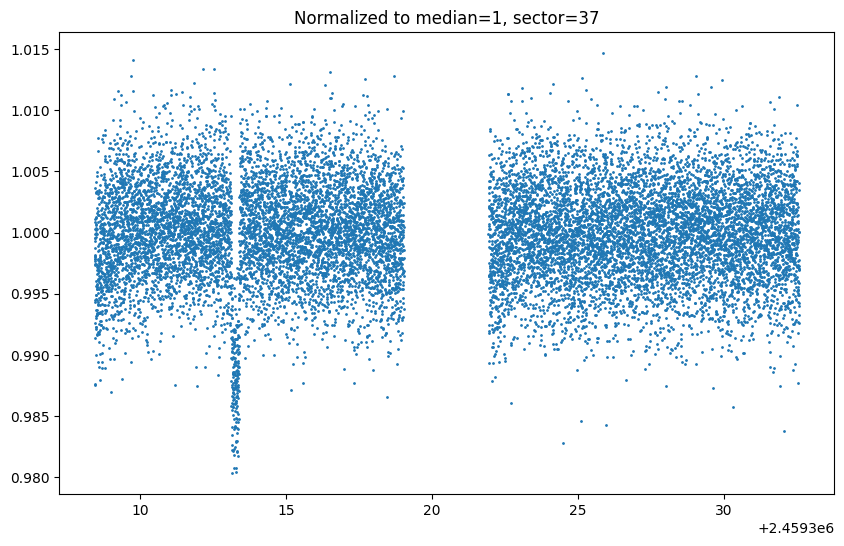

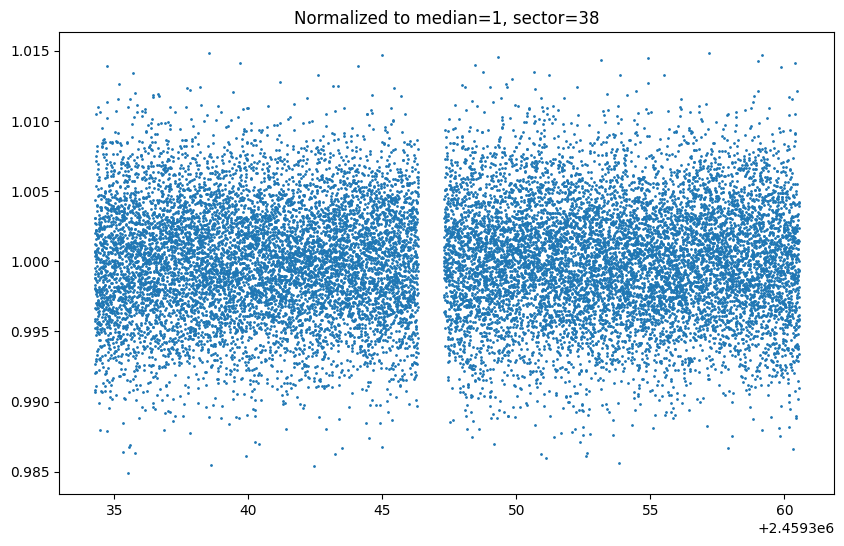

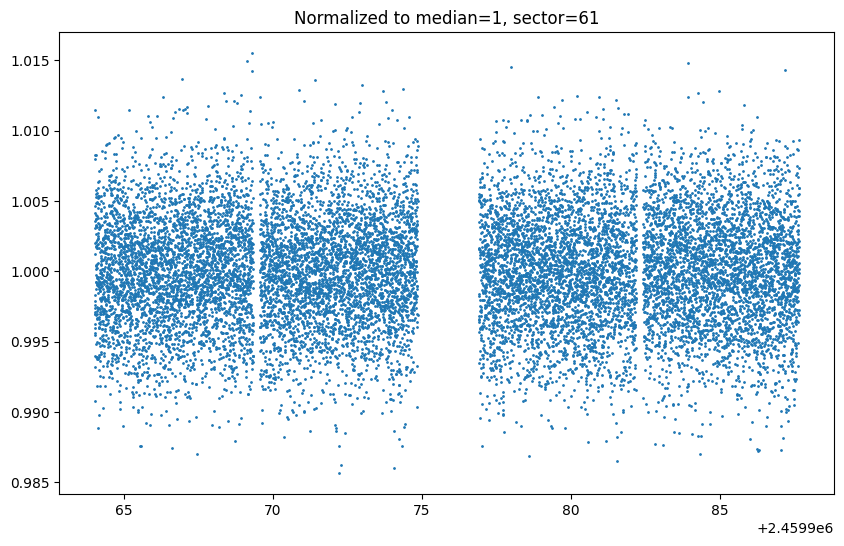

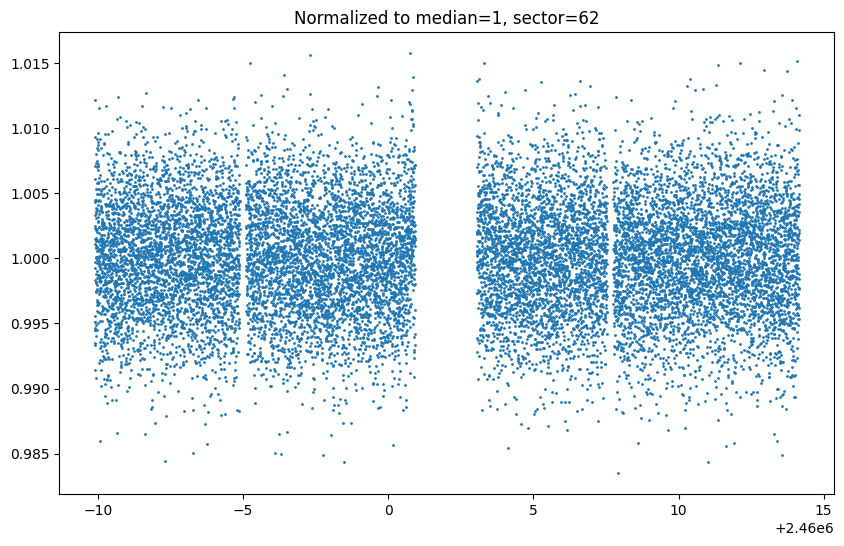

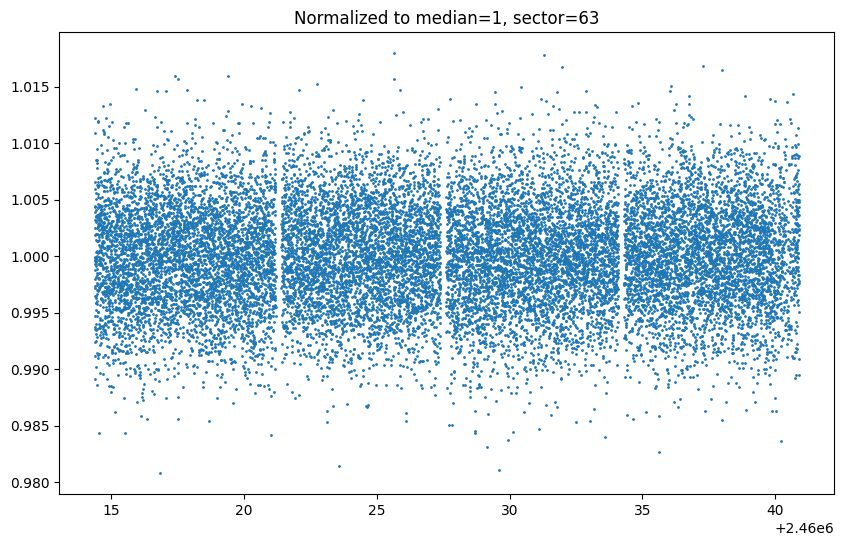

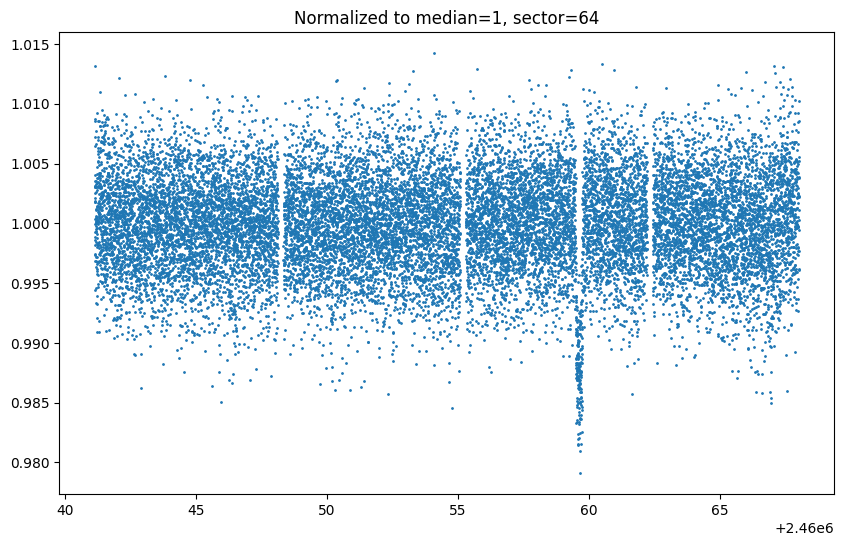

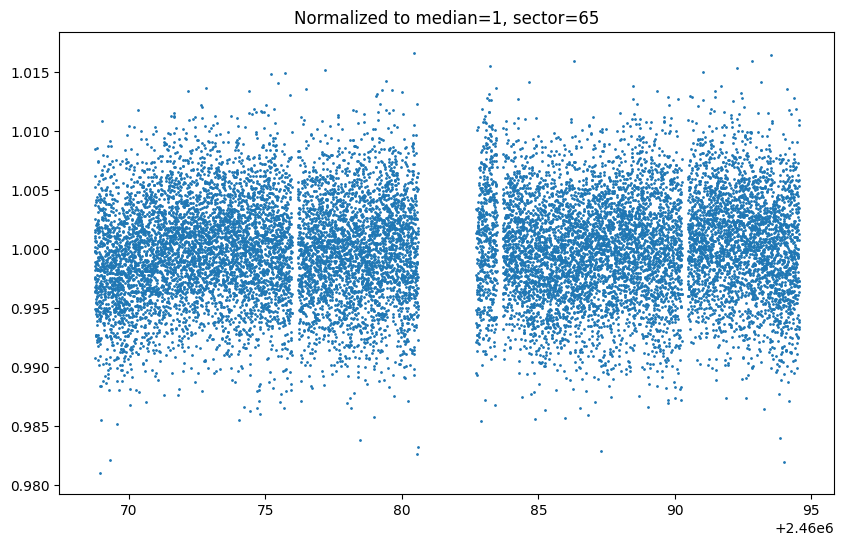

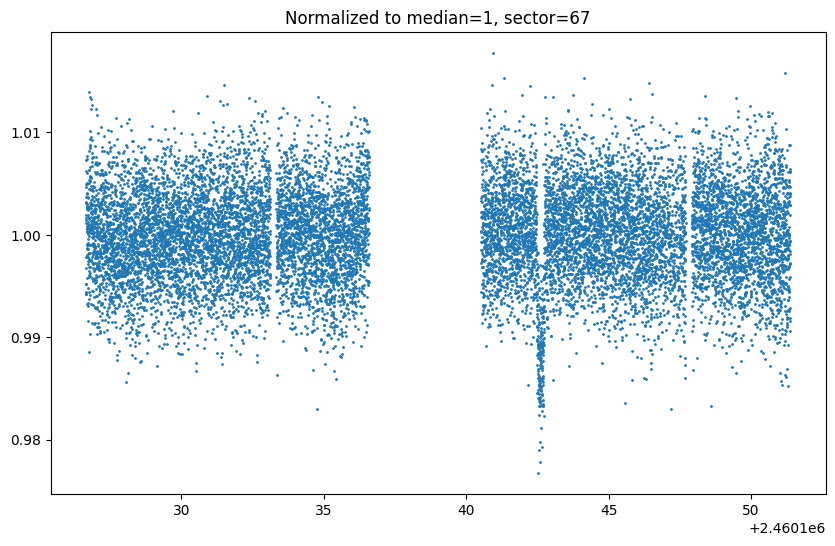

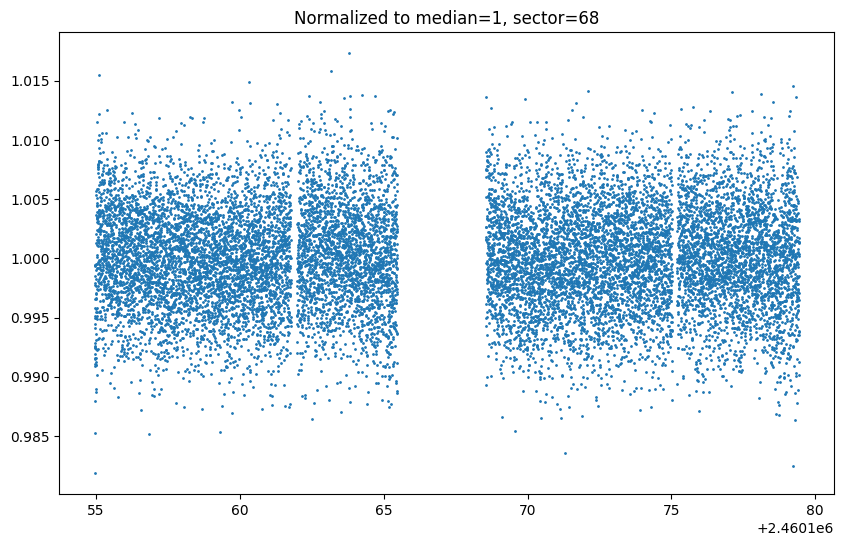

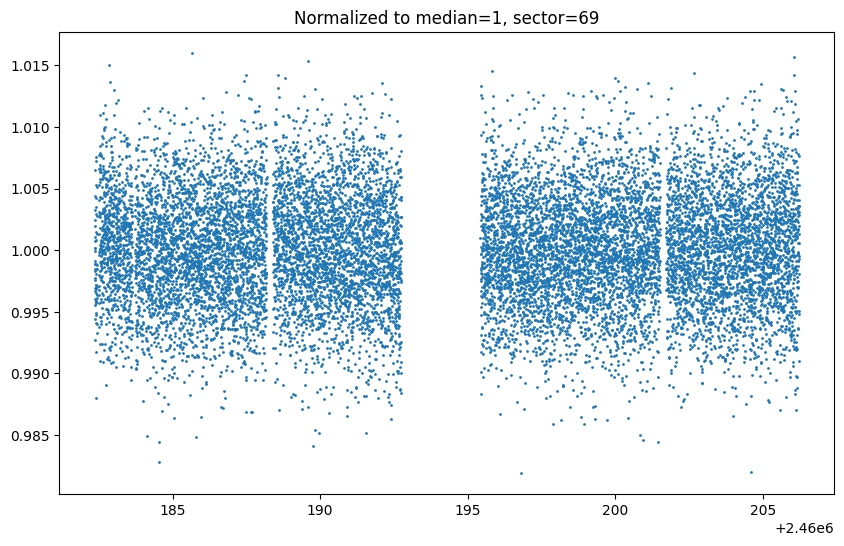

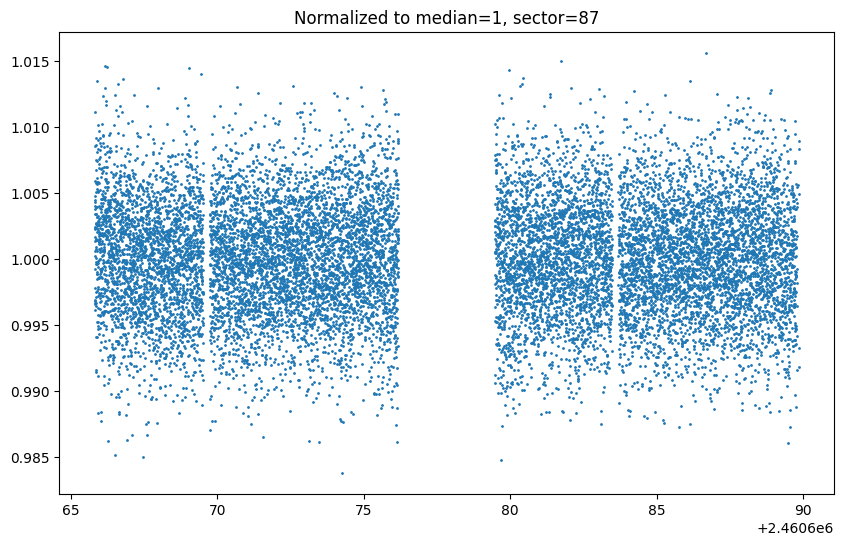

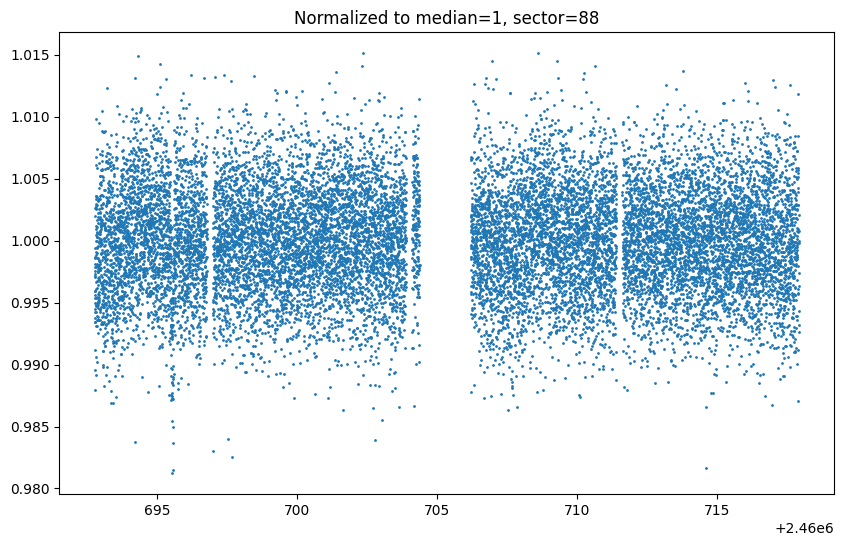

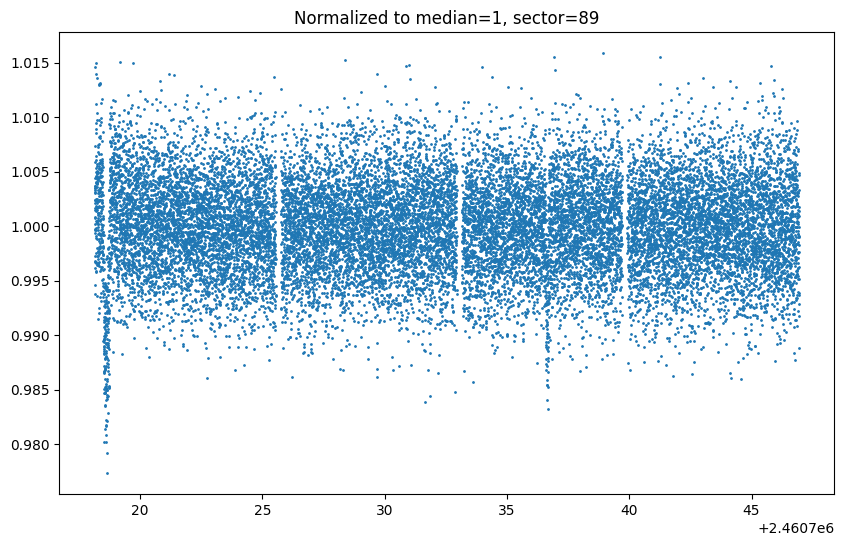

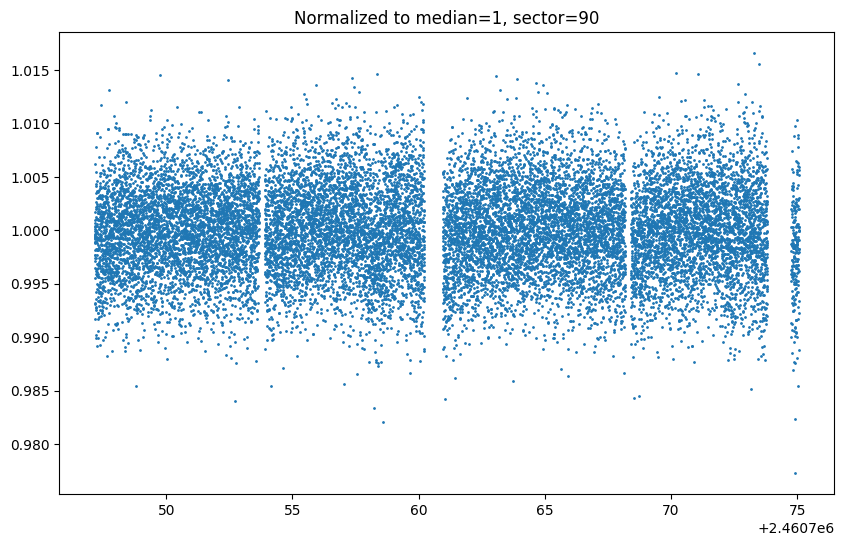

In [6]:
for df, sector in zip(spoc_dfs, spoc_sectors):
    median = median_flux(df)
    df = scale_flux(df, 1/median)
    plot_this(df.time, [df.flux], ["flux"], title=f"Normalized to median=1, {sector=}")

In [7]:
for df, sector in zip(spoc_dfs, spoc_sectors):
    full_path = path + f"{sector}/{sector}_SPOC_120_p.csv"
    df2csv(df, full_path)